In [44]:
#   Curse Of Dimensionality

#   차원을 낮출수록 Data의 밀도가 높아짐!
#   학습의 효율을 높이기 위해서 차원을 낮춰야함.
#   차원을 높이면 높일수록, 밀집도가 낮아져서 특성을 확인하기가 어려움.

In [45]:
#  Principal Componetn Alnalysis(PCA, 주 성분 분석 ) -> 차원을 낮추는 방법

#   기본 2차원의 데이터에 rgb 색을 넣으려면 RGB(1.1.1) 을 추가해야 해서 5차원의 데이터가 됨.
#   차원을 낮추는 방법으로 해결해야한다.

In [46]:
import numpy as np  # 수학연산을 위한 numpy
import pandas as pd # data 정리를 위한 pandas
import sklearn  #data 전처리를 위한 scikit-learn
import matplotlib.pyplot as plt # data 시각화를 위한 plot

In [47]:
# 차원의 축소

from sklearn.datasets import load_digits  # scikit learn에 있는 dataset 불러오기
digits = load_digits()

In [48]:
print(digits.DESCR)
# 8*8 image of integer pixel : 숫자를 표현하기 위해서 64개의 칸이 필요함 = 64 차원이 필요함.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [49]:
data = digits.data
label = digits.target # data.set에서는 target = label

In [50]:
print(data[0])
print(label[0])
# 0이라는 숫자를 이미지로 표현하기 위해서 [ ]안의 데이터가 들어감.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [51]:
#   위 data의 모양을 바꾸고 싶다.
#   Data의 형태를 reshape( )를 사용해서 변경가능!

data[0].reshape((8,8))
#   numpy의 큰 능력 : data의 모양을 쉽게 바꿀 수 있다.
#   하지만, 아직도 64차원이다.
#   숫자가 높으면 높을 수록 진하게 표현 -> 숫자의 배열을 보면 0 모양!

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Label: 0


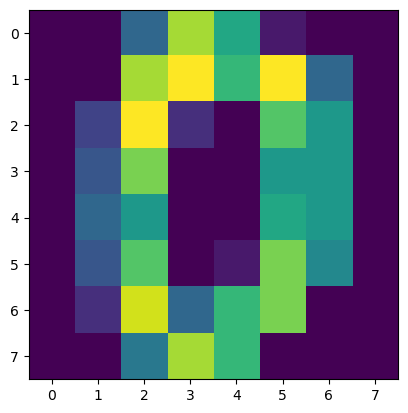

In [52]:
plt.imshow(data[0].reshape((8,-1)))
#   8,-1 은 8개씩 끊고, 나머지는 프로그램이 알아서 정리하는것! -> reshape((8,8))을 쉽게 표현함!
#   (( )) 는 tuple 타입이기 때문!
#   0의 모양이 실제로 만들어짐!

print('Label: {0}'.format(label[0]))

In [53]:
#   Decompostion : 차원을 축소하는 package

from sklearn.decomposition import PCA
#   PCA module 호출

pca = PCA(n_components=2)  
#   n_components=2 : 2차원으로 축소
#   축소된 차원은 다시 복구학기 어려움.
#   원본 차원의 Data를 날리지 않고 가지고 있으면 됨!

In [54]:
#   데이터에서 주 성분을 찾기

new_data = pca.fit_transform(data)

In [56]:
# 결과 살펴보기 

print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA 데이터의 차원 
(1797, 2)


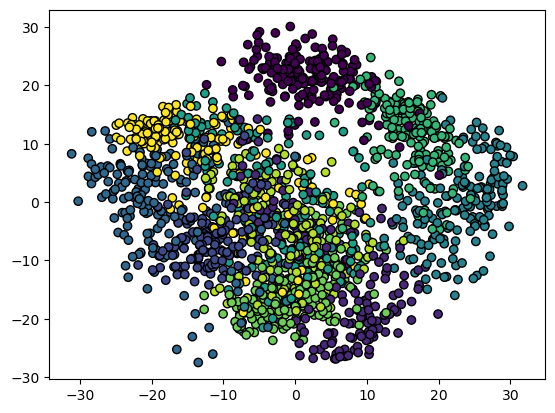

In [58]:
plt.scatter(new_data[:,0],new_data[:,1],c=label,linewidths=1,edgecolors='black')
#   데이터의 밀도가 훨씬 높아져서 분석하기 좋아짐! -> 몰림 현상
#   차원을 축소한다고 특성이 없어지진 않음.